In [1]:
# This code shows how we create the mask for lanes. It is code adapted from the TUSimple Repo

In [90]:
# Library imports
import time, math, cv2, imutils, os, json, random
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [91]:
TRAIN_DIR = Path.cwd().joinpath('lane_detection_data').joinpath('train_set')

In [37]:
label_files = [f for f in TRAIN_DIR.glob('*.json')]

json_gt = []
for label_file in label_files:
    json_gt.extend([json.loads(line) for line in open(TRAIN_DIR.joinpath(label_file))])

In [39]:
#pred, gt = json_pred[0], json_gt[0]
gt = json_gt[0]
#pred_lanes = pred['lanes']
#run_time = pred['run_time']
gt_lanes = gt['lanes']
y_samples = gt['h_samples']
raw_file = gt['raw_file']

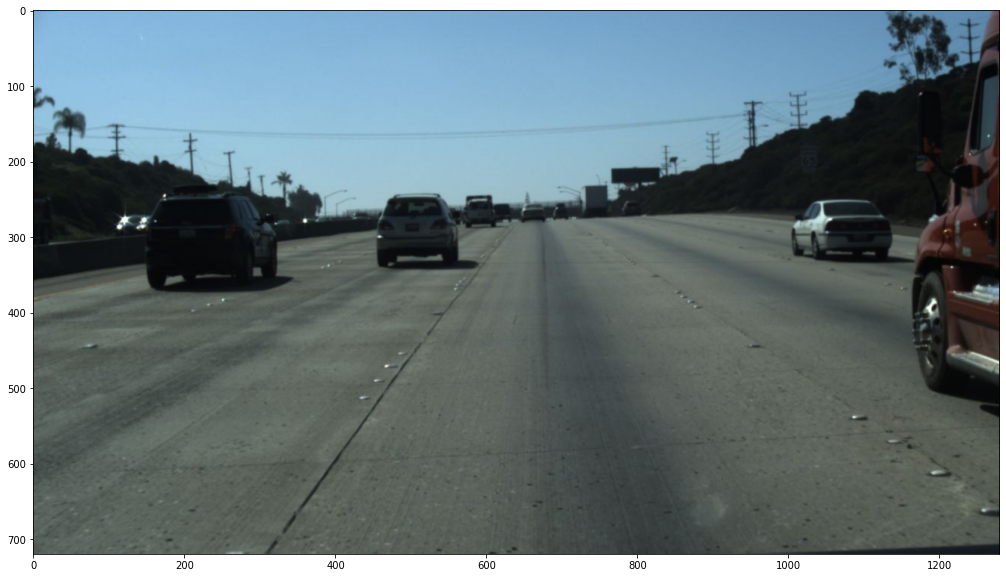

In [40]:
img = plt.imread(TRAIN_DIR.joinpath(raw_file))
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()

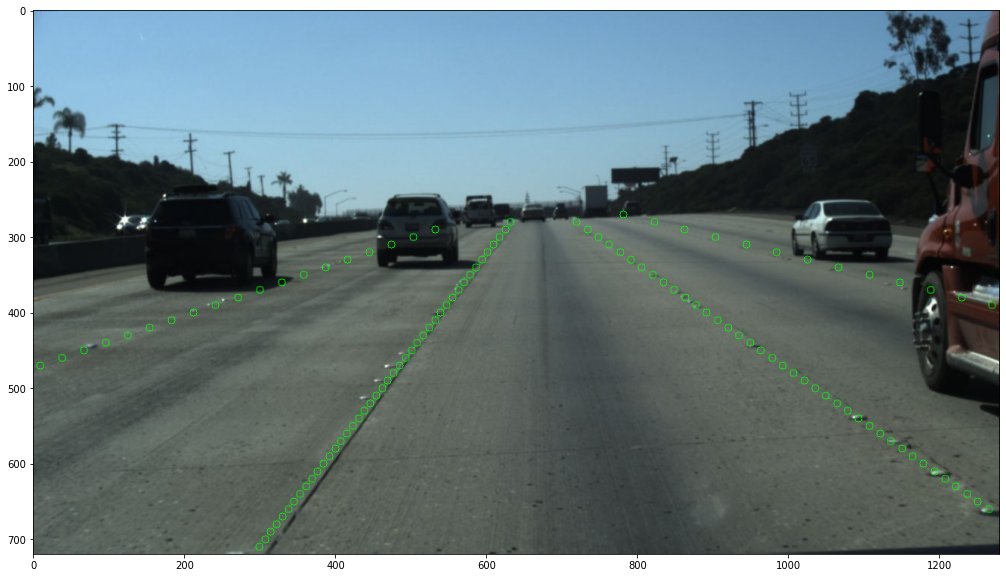

In [41]:
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
img_vis = img.copy()

for lane in gt_lanes_vis:
    for pt in lane:
        cv2.circle(img_vis, pt, radius=5, color=(0, 255, 0))

plt.figure(figsize=(20,10))
plt.imshow(img_vis)
plt.show()

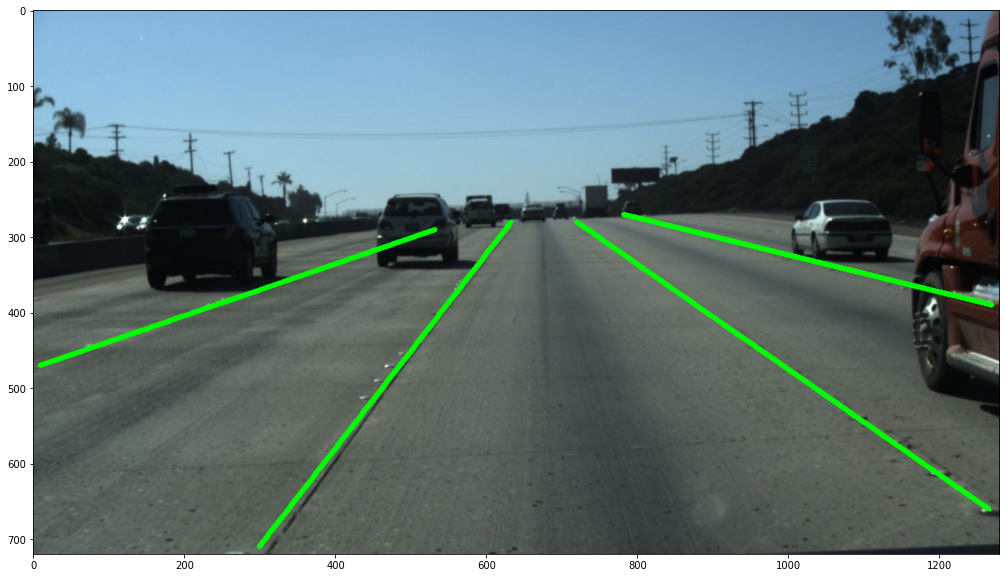

In [42]:
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
#pred_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in pred_lanes]
img_vis = img.copy()

for lane in gt_lanes_vis:
    cv2.polylines(img_vis, np.int32([lane]), isClosed=False, color=(0,255,0), thickness=5)
#for lane in pred_lanes_vis:
#    cv2.polylines(img_vis, np.int32([lane]), isClosed=False, color=(0,0,255), thickness=2)

plt.figure(figsize=(20,10))
plt.imshow(img_vis)
plt.show()

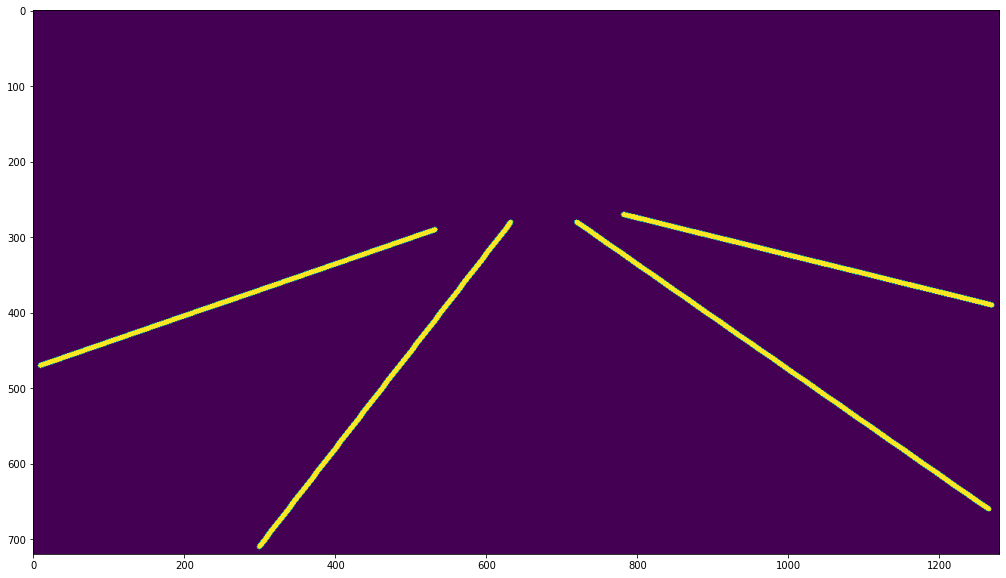

In [48]:
#Make Ground Truth Image mask
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
gt_mask = np.zeros(img.shape[0:2])

for lane in gt_lanes_vis:
    cv2.polylines(gt_mask, np.int32([lane]), isClosed=False, color=(255), thickness=5)

plt.figure(figsize=(20,10))
plt.imshow(gt_mask)
plt.show()